In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scienceplots
from astropy.io import fits

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [8]:
path =os.path.join("COM_PowerSpect_CMB_R1.10.fits")
hdul = fits.open(path)
hdul.info()

Filename: COM_PowerSpect_CMB_R1.10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  LOW-ELL       1 BinTableHDU     54   48R x 4C   [I, E, E, E]   
  2  HIGH-ELL      1 BinTableHDU     58   74R x 5C   [I, I, I, E, E]   
  3  COV-MAT       1 ImageHDU        22   (74, 74)   float32   


In [24]:
# --- LOW-ELL ---
low_data = hdul[1].data
ell_low = low_data["ELL"]
dell_low = low_data["D_ELL"]
err_low = [low_data["ERRDOWN"], low_data["ERRUP"]]  # barras de error

# --- HIGH-ELL ---
high_data = hdul[2].data
ell_high = high_data["ELL"]
dell_high = high_data["D_ELL"]
err_high = high_data["ERR"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


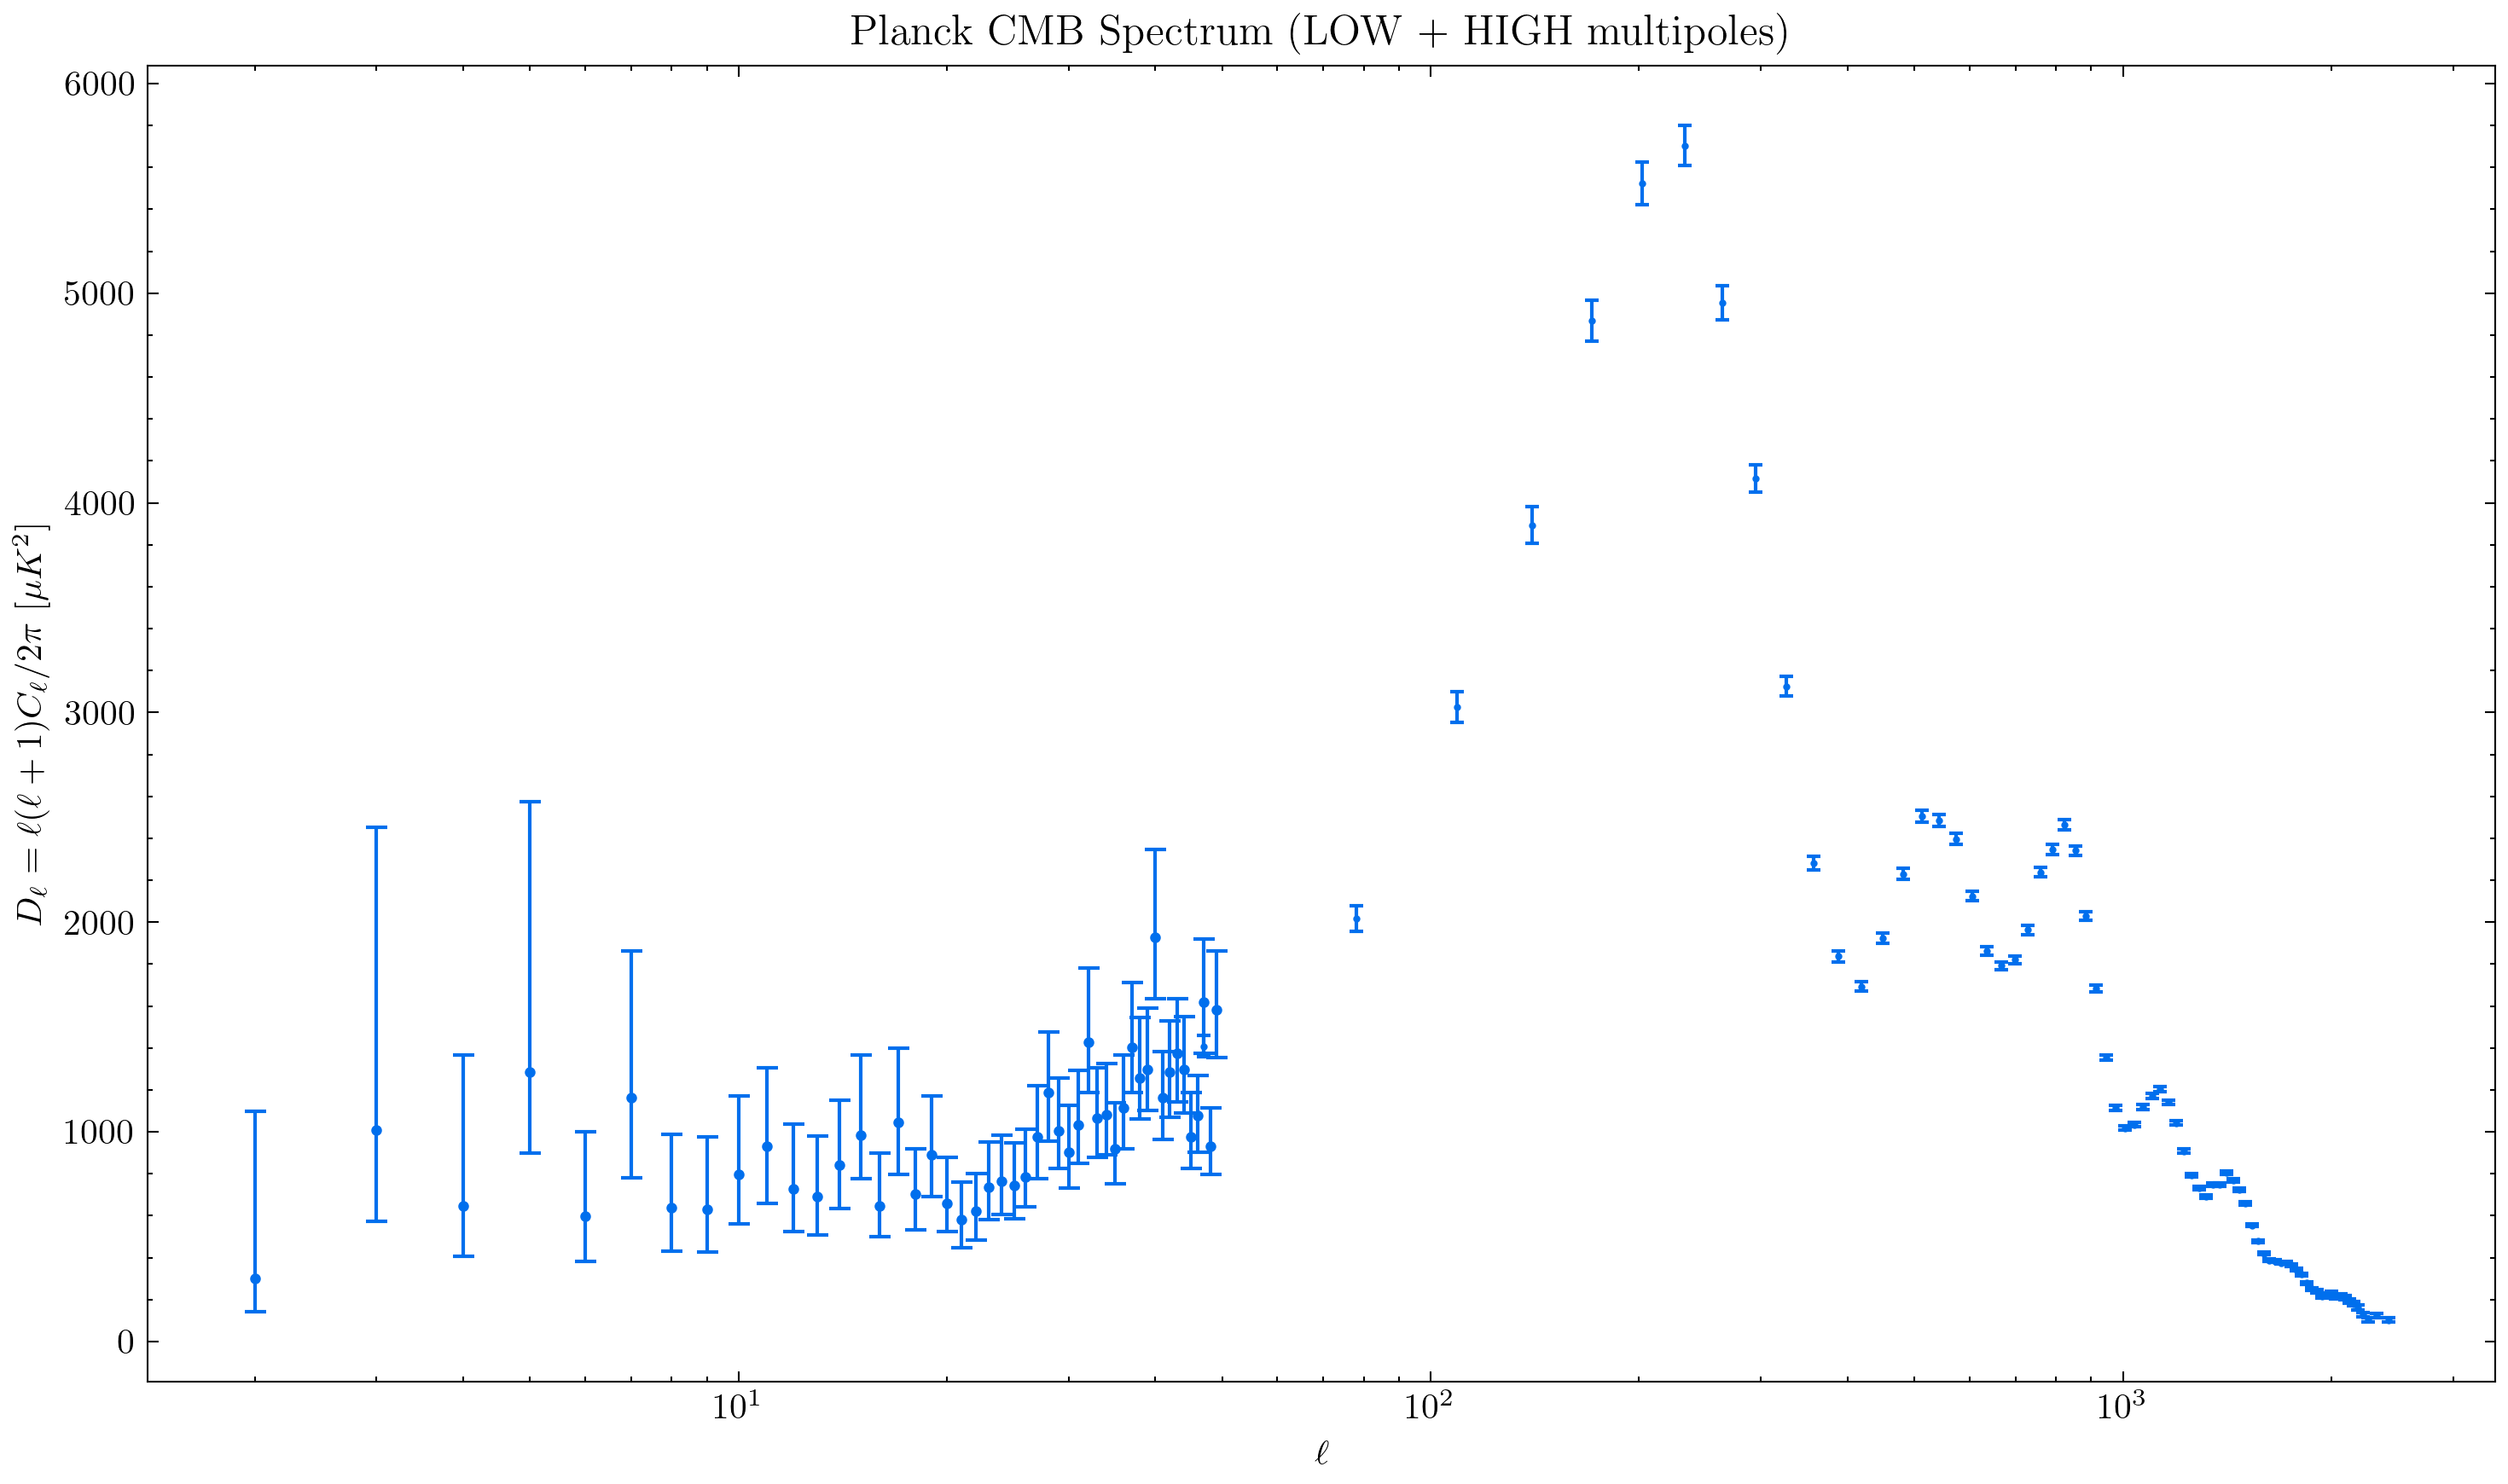

In [33]:
plt.figure(figsize=(10,6))
plt.errorbar(
    ell_low, 
    dell_low, 
    yerr=err_low, 
    fmt="o", 
    capsize=3,
    markersize=2,
    color ='#006FED'
)
plt.errorbar(
    ell_high, 
    dell_high, 
    yerr=err_high, 
    fmt=".", 
    capsize=2,
    markersize=2,
    color='#006FED'
)

plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_\ell = \ell(\ell+1)C_\ell/2\pi \ [\mu K^2]$")
plt.title("Planck CMB Spectrum (LOW + HIGH multipoles)")
plt.legend()
plt.tight_layout()
plt.show()